In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics

# The Task
The challenge is to use data to determine which factors go into making a successful film. The goal is to demonstrate my approach thinking about an analytical problem and to cleaning, visualizing, and analyzing a real dataset.

Based on this information, this sounds like a challenge where I will be spending the majority of my time exploring the data and working on understanding the factors that go into a successful film.

In [2]:
df = pd.read_csv('movie_data.csv')

In [3]:
df.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 26)

Here I can see all of the columns that are involved. In the explanation of this coding challenge, a few of the columns were explained. I will be exploring the data to get a better understanding of each of these columns.

In [5]:
df.columns

Index(['color', 'director_name', 'num_critic_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_users_voted', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'num_user_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'movie_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

# Cleaning the Data
In the interest of time, I'm going to remove some of the columns right from the start, before performing various types of analysis such as analysis of null values.  If I had more time, I would certainly look into the other columns.

In [6]:
# remove columns that I don't have time to analyze
df = df[['duration','gross','genres','aspect_ratio','budget','title_year','movie_score']]

## Checking for duplicates
From below I can see that there are some duplicated rows. I'm going to drop these duplicates using the drop_duplicates() method

In [7]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.head()

,duration,gross,genres,aspect_ratio,budget,title_year,movie_score
137,110.0,124051759.0,Action|Adventure|Drama|Romance,2.35,180000000.0,2016.0,6.6
187,115.0,292298923.0,Adventure|Drama|Fantasy|Romance,2.35,120000000.0,2012.0,5.5
204,120.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,2.35,NaN,2016.0,8.2
303,111.0,34964818.0,Adventure|Family|Fantasy,2.35,150000000.0,2015.0,5.8
389,100.0,56114221.0,Action|Adventure|Sci-Fi,2.35,120000000.0,2015.0,4.3


In [8]:
df = df.drop_duplicates()

## Null Values
The first step will be to look at the data that is missing. Using df.isnull() I was able to determine that there are missing values. From here, I want to calculate the percentage of each column that is missing.

In [9]:
# calculating the number missing
df_missing = df.isna()
df_num_missing = df_missing.sum()

# converting to a percentage
df_num_missing_perc = df_num_missing / len(df) * 100

# sorting the df
df_num_missing_perc = df_num_missing_perc.sort_values()

# only keeping values where the percentage missing is greater than 0
df_num_missing_perc = df_num_missing_perc[df_num_missing_perc>0]

Below is a chart that shows all of the columns with more than 0 percent missing values. The gross and budget have the most missing values; however, these are the variables that I want to use in my analysis to determine which movies were successful or not successful. Because of that, it does not make sense to perform imputation since I want these values to be as accurate as possible for the analysis.

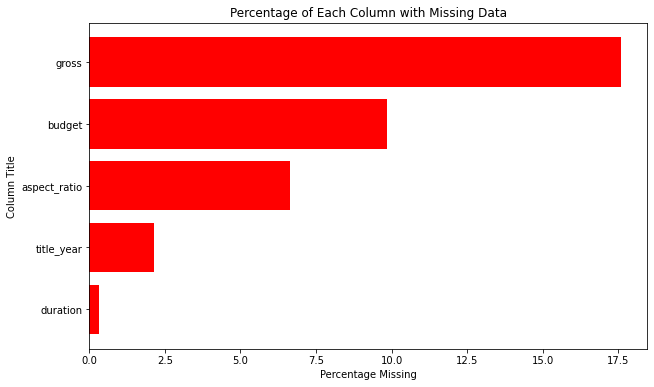

In [10]:
plt.barh(df_num_missing_perc.index, df_num_missing_perc,color='red')
fig = plt.gcf()
fig.set_size_inches(10, 6)
fig.savefig('percentage_missing.png', dpi=100)
plt.title('Percentage of Each Column with Missing Data')
plt.xlabel('Percentage Missing')
plt.ylabel('Column Title')
plt.show()

In [11]:
# removing all rows where there is an empty value in the gross or budget column
mod_df = df.dropna( how='any',subset=['gross','budget']).copy()

The column with the next most null values is aspect_ratio. First, I look at what the values are for the aspect ratio. Here, I can see that most of the movies have an aspect ratio of either 1.85 or 2.35. 

In [12]:
aspect_ratio_counts = mod_df['aspect_ratio'].value_counts()
aspect_ratio_counts.sort_index()

1.18        1
1.33       19
1.37       50
1.50        1
1.66       40
1.75        2
1.77        1
1.78       41
1.85     1582
2.00        3
2.20       10
2.24        1
2.35     1946
2.39       11
2.40        3
2.55        1
2.76        3
16.00       1
Name: aspect_ratio, dtype: int64

### Incorporating Domain Knowledge to Engineer Aspect Ratio Column
I don't think it makes sense to leave this as a numerical column. From a quick google search, it is apparent that the two common aspect ratios are 1.85 and 2.39. This makes aspect ratio seem more to me like a categorical variable, since it is not necessarily continuous. Because of this, I am going to break the aspect_ratio into 3 categories: 1.85, 2.35, and other. 

To fill the missing values, I can either decide to put them into the "other" category or I can put them into the most frequent category. Since the "other" category is so much smaller than the 1.85 or the 2.35 categories, the probability seems low that the empty values would be "other". They would most likely be either 1.85 or 2.35. Because of this, I am going to fill the null values with the most frequent.

In [13]:
# filling null values in aspect_ratio with most frequent
mod_df['aspect_ratio'] = mod_df['aspect_ratio'].fillna(mod_df.aspect_ratio.mode())

In [14]:
def determine_aspect_ratio_var(row):
    if row == 1.85:
        return "1.85"
    elif row == 2.35:
        return "2.35"
    else:
        return "other"

In [15]:
# map the new aspect ratio column
mod_df['aspect_ratio_categorical'] = mod_df['aspect_ratio'].map(determine_aspect_ratio_var)

# drop the column from the dataframe
mod_df = mod_df.drop('aspect_ratio', axis=1)

Next I'll be filling in the title_year and duration columns. These are continuous numeric columns so it makes sense to me to use imputation to fill all the missing values.

In [16]:
mod_df['title_year'].fillna(np.mean(mod_df['title_year']), inplace=True)
mod_df['duration'].fillna(np.mean(mod_df['duration']), inplace=True)

In [17]:
# all values are now filled in for the dataframe that I will be working with
mod_df.isnull().sum()

duration                    0
gross                       0
genres                      0
budget                      0
title_year                  0
movie_score                 0
aspect_ratio_categorical    0
dtype: int64

In [18]:
# reset the index since I just dropped some columns, to avoid gaps
mod_df = mod_df.reset_index()

In [19]:
# split the genres column by the | so that it becomes a comma-separated list
mod_df['genres'] = mod_df['genres'].str.split('|')

# EDA


### Analysis of Gross per Year
Below, I'm graphing the number of movies each year, total movie gross each year, and average movie gross each year. Here I can see that the number of movies released each year aws very small up until 1980 where it started increasing drastically until 2000 where it leveled off. Then in the last 2 years it decreased. In the "Average Movie Gross Per Year" there was a big spike in 1940. However, upon looking into it more, there were just 2 movies that were released that year. In fact, the average movie gross bounced around a lot before 1980, which makes sense when considering that there were relatively few releases during that time. After 1980 there was a lot less variance in the average movie gross, since there were more movies to average on. The "Total Movie Gross Per Year" column closely aligns with the number of movies released each year. This makes sense because as more movies are released, there would be more total gross each year.

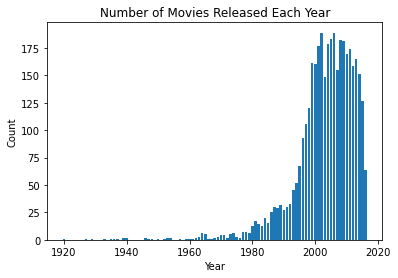

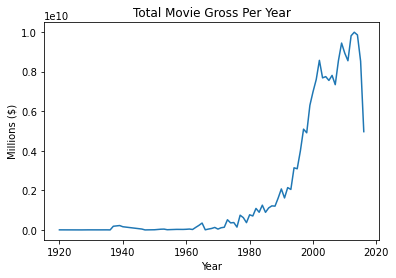

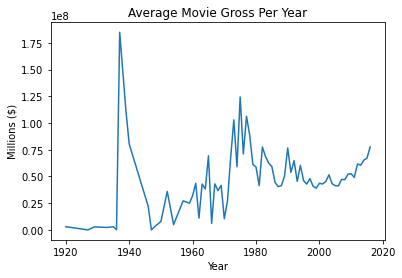

In [20]:
# plotting number of movies released each year
plt.bar(mod_df.groupby('title_year').count()['gross'].index, mod_df.groupby('title_year').count()['gross'])
plt.title("Number of Movies Released Each Year")
plt.ylabel('Count')
plt.xlabel('Year')
plt.savefig('number_of_movies_released_each_year.png', dpi=100)
plt.show()

# plotting total movie gross per year
plt.plot(mod_df.groupby('title_year').sum()['gross'])
plt.title('Total Movie Gross Per Year')
plt.ylabel('Millions ($)')
plt.xlabel('Year')
plt.savefig('total_movie_gross_each_year.png', dpi=100)

plt.show()

# plotting average movie gross per year
plt.plot(mod_df.groupby('title_year').mean()['gross'])
plt.title('Average Movie Gross Per Year')
plt.ylabel('Millions ($)')
plt.xlabel('Year')
plt.savefig('average_movie_gross_each_year.png', dpi=100)

plt.show()

## Analysis of Movie Genres
Below, I can see the frequency of each genre. This includes the frequency that each genre shows up in the list in the 'genre' column, regardless of the order of that list. I will be doing further analysis of the genres below.

### Utilizing Stats Knowledge
Most statisticians agree that the minimum sample size to get any kind of meaningful result is 100. This sample size can vary depending on the type of data that is being worked with and the desired confidence level.  In this case, I think 100 is a reasonable number for futher analysis. This means I will be excluding the genres: Film-Noir, Short, Western, and Documentary.

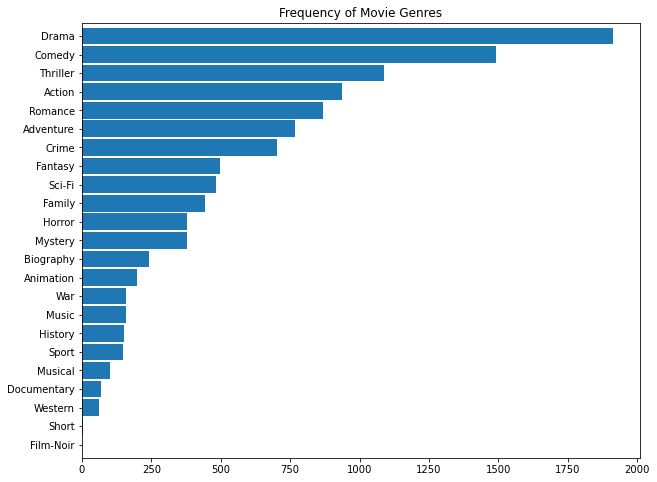

In [21]:
plt.subplots(figsize=(10,8))
genre_list=[]
# create a genre_list and append all of the lists to that genre_list using extend
for i in mod_df['genres']:
    genre_list.extend(i)

# count the values and plot
counts_per_genre = pd.Series(genre_list).value_counts().sort_values()
ax=counts_per_genre.plot.barh(width=0.9)
plt.title('Frequency of Movie Genres')
plt.savefig('frequency_of_movie_genres.png', dpi=100)
plt.show()

In [22]:
# getting list of unique genres that are above the threshold of 100 to perform further analysis
unique_genres = list(counts_per_genre[counts_per_genre>100].index)

### Converting Genres List Column to Binary Columns
In this case, the 'genres' column has a list of all the genres that each movie is in. In order to perform further analysis, I want to convert this single column which contains a list into many binary columns where each column represents another genre of interest. To do this, I create a new dataframe and iterate through each of the rows of the old dataframe to create a row that is correctly represented with binary columns which I then append to new dataframe. This ran pretty fast - only about 5 seconds or so.

In [23]:
# create dataframe with columns that contain all of the genres of interest
genre_df = pd.DataFrame(columns=unique_genres)

# iterate through each row of mod_df
for i in range(len(mod_df)):
    row = mod_df.loc[i]['genres']
    genres_row = []
    # for every genre in the genres of interest, if it is contained in the list for that row, then append '1' to the list, otherwise append '0'
    for genre in unique_genres:
        if genre in row:
            genres_row.append(1)
        else:
            genres_row.append(0)
    # create dataframe row based upon the newly created list and append to the end of genre_df
    new_genre_df_row = pd.DataFrame(columns=unique_genres, data = [genres_row])
    genre_df = genre_df.append(new_genre_df_row)
    
# reset the index of the genre, so that I can join back to the original dataframe
genre_df = genre_df.reset_index(drop=True)

In [24]:
# append the columns to the dataframe and drop the old 'genres' column
mod_df = mod_df.drop('genres', axis=1).join(genre_df)

In [25]:
# convert to type int32 so that the columns are numerical and not categorical
mod_df[unique_genres] = mod_df[unique_genres].astype('int32')

## Statistics by Genre
I wrote a function below which I will use to create several charts. The function uses the groupby().mean() to find the average value of a certain statistic for each genre. It then creates a series which contains all of these statistics. It then plots the dataframe as a horizontal bar plot. Finally, it returns a dataframe which contains the calculated values, which can then be appended to a statistics_by_genre dataframe.

In [26]:
def plot_statistics_by_genre(stat_type, title, xlabel, ylabel,color):
    statistics_by_genre = []
   
    # iterate through all of the genres of interest
    for genre in unique_genres:
        # find the average value of a certain statistic for each genre
        statistics_by_genre.append(mod_df.groupby(genre).mean()[stat_type][1])
    # create a series which contains all of the statistics that were just calculated
    statistics_by_genre_df = pd.Series(index = unique_genres, data = statistics_by_genre)
    # sort the series
    statistics_by_genre_df.sort_values(inplace=True)
    
    # plot the series
    plt.subplots(figsize=(10,8))
    plt.barh(statistics_by_genre_df.index, statistics_by_genre_df,color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(title+'.png', dpi=100)
    plt.show()
    # return the series as a dataframe, to easily join with other dataframes
    return pd.DataFrame(statistics_by_genre_df, columns=[title])

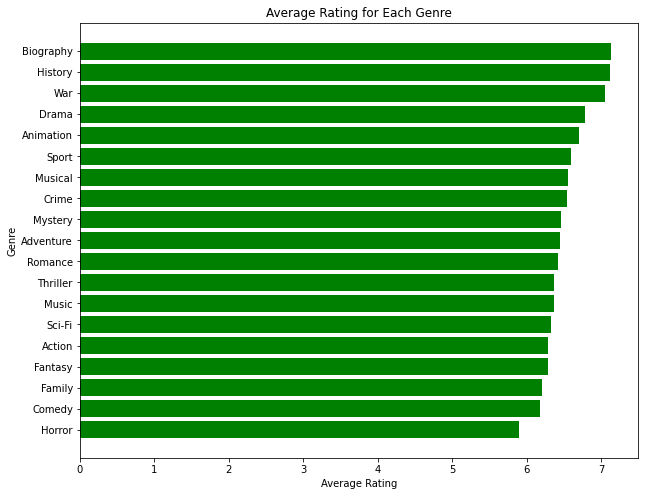

In [27]:
# calculate average rating for each genre
average_ratings_by_genre = plot_statistics_by_genre('movie_score','Average Rating for Each Genre','Average Rating','Genre','green')
statistics_by_genre = average_ratings_by_genre

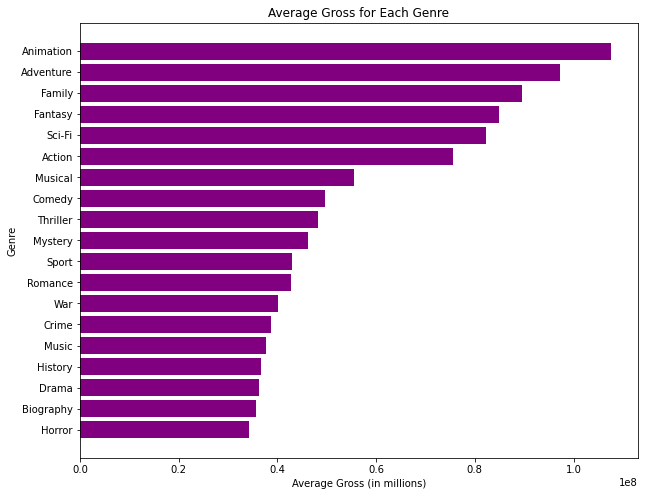

In [28]:
# calculate average gross for each genre
average_gross_by_genre = plot_statistics_by_genre('gross','Average Gross for Each Genre','Average Gross (in millions)','Genre','purple')
statistics_by_genre = statistics_by_genre.join(average_gross_by_genre)

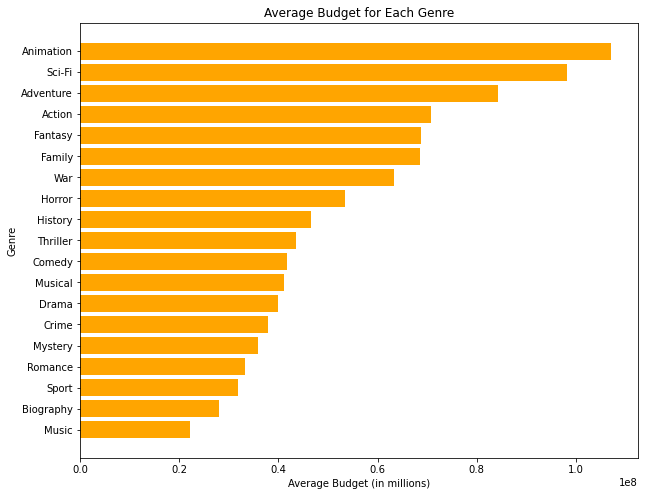

In [29]:
# calculate average budget for each genre
average_budget_by_genre = plot_statistics_by_genre('budget','Average Budget for Each Genre','Average Budget (in millions)','Genre','orange')
statistics_by_genre = statistics_by_genre.join(average_budget_by_genre)

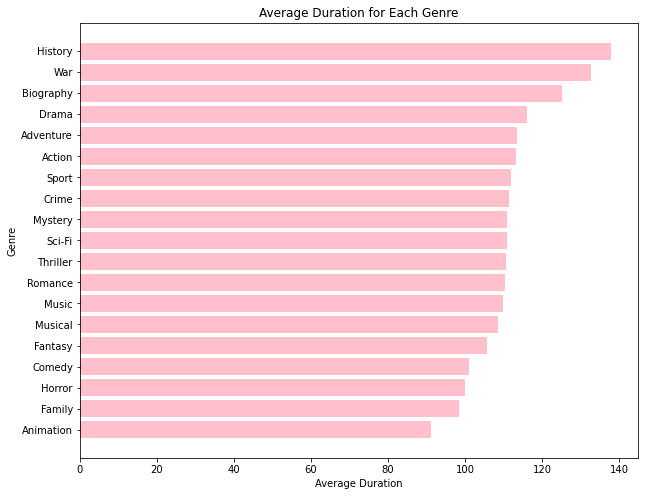

In [30]:
# calculate average duration for each genre
average_duration_by_genre = plot_statistics_by_genre('duration','Average Duration for Each Genre','Average Duration','Genre','pink')
statistics_by_genre = statistics_by_genre.join(average_duration_by_genre)

### Use Math/Statistics to Create a New Useful Metric
To calculate the revenue/budget ratio, I first have to get the revenue. My given column is called Gross. Gross profit is defined Gross = Revenue - Expenses. Therefore, Revenue = Gross + Expenses. Therefore, in order to calculate the revenue/budget ratio, the formula would be (Gross + Budget ) / Budget. This would get the average revenue per dollar spent (assuming the expenses didn't go too far over or under the budget).

In [31]:
# calculate the revenue/budget ratio
statistics_by_genre['revenue_budget_ratio'] = (statistics_by_genre['Average Gross for Each Genre'] + statistics_by_genre['Average Budget for Each Genre'])/ statistics_by_genre['Average Budget for Each Genre']

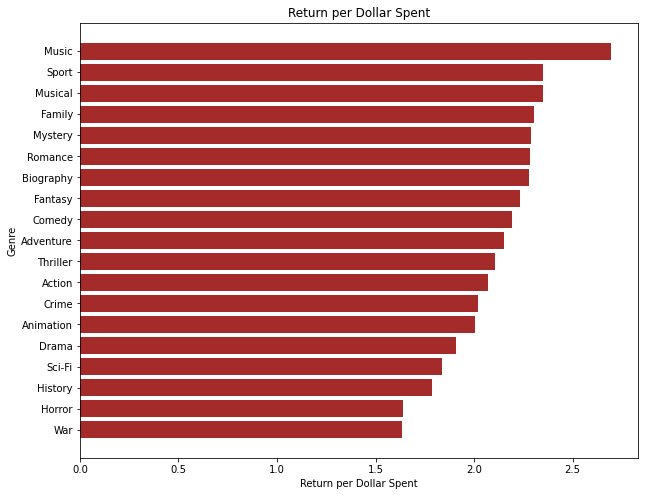

In [32]:
# plot the revenue/budget ratio
statistics_by_genre = statistics_by_genre.sort_values(by = 'revenue_budget_ratio')
plt.subplots(figsize=(10,8))
plt.barh(statistics_by_genre.index, statistics_by_genre['revenue_budget_ratio'],color='brown')
title = "Return per Dollar Spent"
plt.title(title)
plt.xlabel("Return per Dollar Spent")
plt.ylabel("Genre")
plt.savefig(title+'.png', dpi=100)
plt.show()

In [33]:
statistics_by_genre

,Average Rating for Each Genre,Average Gross for Each Genre,Average Budget for Each Genre,Average Duration for Each Genre,revenue_budget_ratio
War,7.048428,4.011282e+07,6.332361e+07,132.729560,1.633458
Horror,5.903958,3.420813e+07,5.350955e+07,99.989446,1.639290
History,7.122876,3.662936e+07,4.648342e+07,137.954248,1.788009
Sci-Fi,6.327273,8.220839e+07,9.812494e+07,110.735537,1.837793
Drama,6.787774,3.622543e+07,3.992787e+07,115.993730,1.907272
Animation,6.700508,1.076618e+08,1.071431e+08,91.030457,2.004841
Crime,6.545661,3.867013e+07,3.792698e+07,111.256046,2.019594
Action,6.285989,7.563954e+07,7.071363e+07,113.185027,2.069660
Thriller,6.372309,4.814326e+07,4.360698e+07,110.491260,2.104026
Adventure,6.454961,9.731147e+07,8.434784e+07,113.406005,2.153693


## Analysis of Aspect Ratio
Below I can see that every genre uses aspect ratios from all 3 categories. Also I can see that movies with aspect ratios of 1.85 or 2.35 typically have a larger budget and gross amount, probably because they were meant more for a general audience. The movies with any other aspect ratio typically had a lower gross/budget but they did have a slightly better score. This is probably because these movies are more niche and artistic which leads to a better movie_score but with less money involved.

In [34]:
mod_df.groupby('aspect_ratio_categorical').sum()[unique_genres]

,Musical,Sport,History,Music,War,Animation,Biography,Mystery,Horror,Family,Sci-Fi,Fantasy,Crime,Adventure,Romance,Action,Thriller,Comedy,Drama
aspect_ratio_categorical,,,,,,,,,,,,,,,,,,,
1.85,34,59,40,80,44,107,95,110,157,238,159,218,264,239,418,215,306,842,793
2.35,40,75,98,59,104,65,136,248,205,162,303,245,412,480,386,688,743,539,1004
other,28,13,15,20,11,25,11,19,17,42,22,33,27,47,64,32,38,111,117


In [35]:
# calculate the average gross, budget, and movie score for each of the aspect ratios
aspect_gross_budget_movie = mod_df.groupby('aspect_ratio_categorical').mean()[['gross','budget','movie_score']]

In [36]:
# calculate the count for each of the aspect ratios
aspect_count = mod_df.groupby('aspect_ratio_categorical').count()['index']

In [37]:
# I could have used df.groupby.agg() instead of just concatenating two series, but that led to a few extra unnecessary columns. This way was cleaner
pd.concat([aspect_count, aspect_gross_budget_movie],axis=1).rename(columns={'index':'count'})

,count,gross,budget,movie_score
aspect_ratio_categorical,,,,
1.85,1582,4.357106e+07,3.892494e+07,6.369975
2.35,1946,5.747586e+07,5.225904e+07,6.507862
other,262,3.607303e+07,2.377085e+07,6.672519
